In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
from IPython.display import display

## The Wigner function

### In the following we are defining the Wigner function, which represents quantum states in phase space.

### $W(\mathbb{r}) = \frac{1}{(2\pi)^n\sqrt{\det(\mathbb{\sigma})}} e^{-\frac{1}{2} (\mathbb{r}-\mathbb{\bar{r}})^T \sigma^{-1} (\mathbb{r}-\mathbb{\bar{r}})}$

### Gaussian states are the states that make the Wignerr look like a Gaussian function. These states are fully characterized by the vector r and the covariance matrix. The vector r is determined by the position and phase of a particle and the covariance matrix is determined from the expectation value of these.

In [4]:
def wigner(x, p, d = 0, F = np.identity(2)):
    n = 1
    
    r_ave = F @ np.array([0,0]) + d
    cov = F @ (0.5 * np.array([[1,0],[0,1]])) @ F.T
    
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)

    W = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            r = np.array([x[i,j],p[i,j]])
            diff = r - r_ave
            W[i,j] = 1/((2*np.pi)**(n) * np.sqrt(det_cov)) * np.exp(-0.5 * diff.T @ inv_cov @ diff)
    return W

## Gaussian Operations

### These are the operations we can apply to the Gaussian states that preserves their "Gaussianess". These operations only transform the vector r and the covariance matrix as these determine the state completely. Unitary Gaussian operations correspond to the operators that transforms
### $\sigma \rightarrow F\sigma F^T$, $\bar{r} \rightarrow F\bar{r} + d$
### Where d is a 2n-dimensional real vector and the matrix F fulfills
### $F \Omega F^T = \Omega$,  $\Omega = I_n \otimes \begin{bmatrix} 0 & 1 \\\ -1 & 0 \end{bmatrix}$

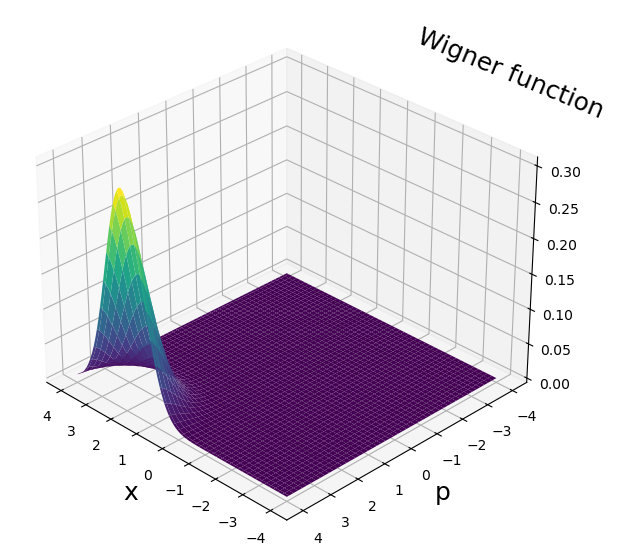

In [5]:
p = np.linspace(-4, 4, 100)
x = np.linspace(-4, 4, 100)
X, P = np.meshgrid(x, p)

#Displacement
alpha = 2 + 4.2j
d = np.array([np.real(alpha),np.imag(alpha)])

#Squeezing
s = np.pi
theta = np.pi
F_s = np.cosh(s) * np.identity(2) - np.sinh(s) * np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])

W = wigner(X, P, d = d)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, P, W, cmap='viridis')

ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('p', fontsize=18)
ax.text2D(0.75, 0.8, "Wigner function", transform=ax.transAxes, fontsize=18, rotation = -22.5)

ax.view_init(elev=30, azim=135)

plt.show()

In [11]:
@interact(alpha_real=(.1,5), alpha_imag=(.1,5), s=(0., 2*np.pi), theta=(0., 2*np.pi), show_signal=True)

def plot_modsig(alpha_real=1, alpha_imag=1, s=np.pi, theta=np.pi, show_signal=True):
    p = np.linspace(-4, 4, 100)
    x = np.linspace(-4, 4, 100)
    X, P = np.meshgrid(x, p)

    #Displacement
    d = np.array([alpha_real, alpha_imag])
    
    #Squeezing
    F_s = np.cosh(s) * np.identity(2) - np.sinh(s) * np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
    
    W = wigner(X, P, d = d, F = F_s)
    
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, P, W, cmap='viridis')

    ax.set_xlabel('x', fontsize=18)
    ax.set_ylabel('p', fontsize=18)
    ax.text2D(0.75, 0.8, "Wigner function", transform=ax.transAxes, fontsize=18, rotation = -22.5)
    
    ax.view_init(elev=30, azim=135)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='alpha_real', max=5.0, min=0.1), FloatSlider(value=1.…